# ML UVA Project: Predicting Opioid Overdoses in VA

In [7]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/gdrive')

In [9]:
# to make this notebook's output stable across runs
np.random.seed(42)

# file_path_google = "/content/gdrive/My Drive/ML_Project/clean_opioid.csv"
file_path_local = "clean_opioid.csv"


df = pd.read_csv(file_path_local)
print(df.head())
print(df.head())
print(df.info())
print(df.describe())

    fips  Diagnosed HIV  ED Heroin Overdose  ED Opioid Overdose  EMS Narcan  \
0  51001            3.0                 6.1                60.7        48.6   
1  51003            2.8                 8.4                84.2        15.9   
2  51005            6.4                 0.0               218.0        12.8   
3  51007            7.7                 0.0                54.2        23.2   
4  51009            6.3                 0.0                79.0        19.0   

   Fatal Fentanyl and/or Heroin Overdose  Fatal Prescription Opioid Overdose  \
0                                   12.1                                12.1   
1                                    0.9                                 0.9   
2                                    6.4                                12.8   
3                                    7.7                                 0.0   
4                                    3.2                                 6.3   

   Reported Hepatitis C (18-30 year olds)  p

                                            fips  Diagnosed HIV  \
fips                                    1.000000       0.224897   
Diagnosed HIV                           0.224897       1.000000   
ED Heroin Overdose                      0.209240       0.111642   
ED Opioid Overdose                      0.136897       0.049938   
EMS Narcan                              0.478540       0.186004   
Fatal Fentanyl and/or Heroin Overdose   0.239031       0.262313   
Fatal Prescription Opioid Overdose      0.042518      -0.026189   
Reported Hepatitis C (18-30 year olds) -0.078049       0.031140   
Average Household size                 -0.047172       0.031753   
High School graduate or higher          0.133456      -0.111182   
Veterans                               -0.028071       0.122025   
With Disability                        -0.131097      -0.074326   
Foreign Born                            0.283065       0.116022   
Language spoken at home - English      -0.305244      -0.11943

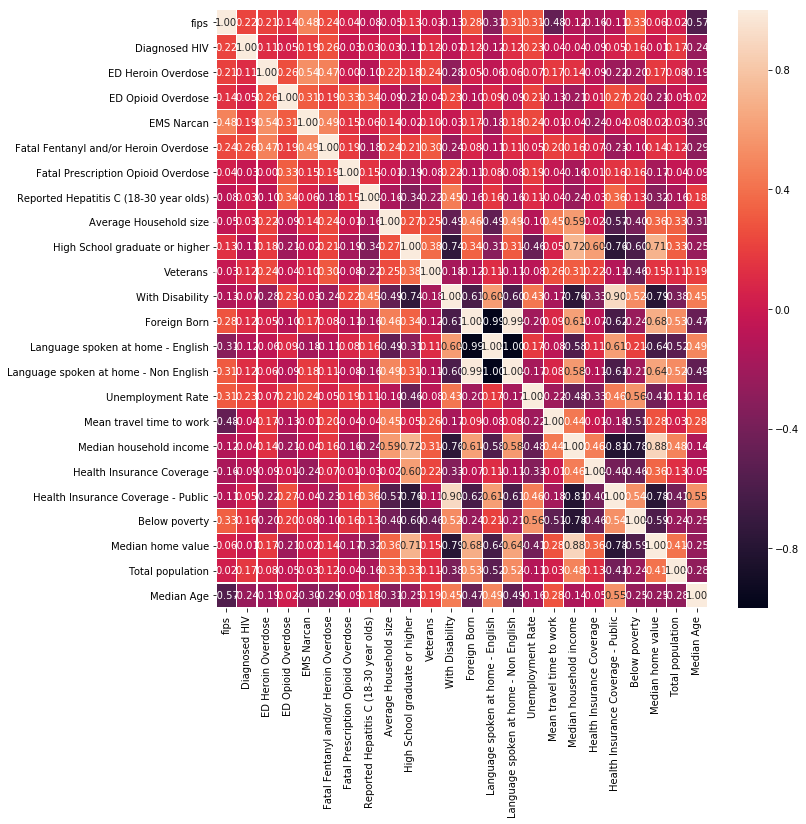

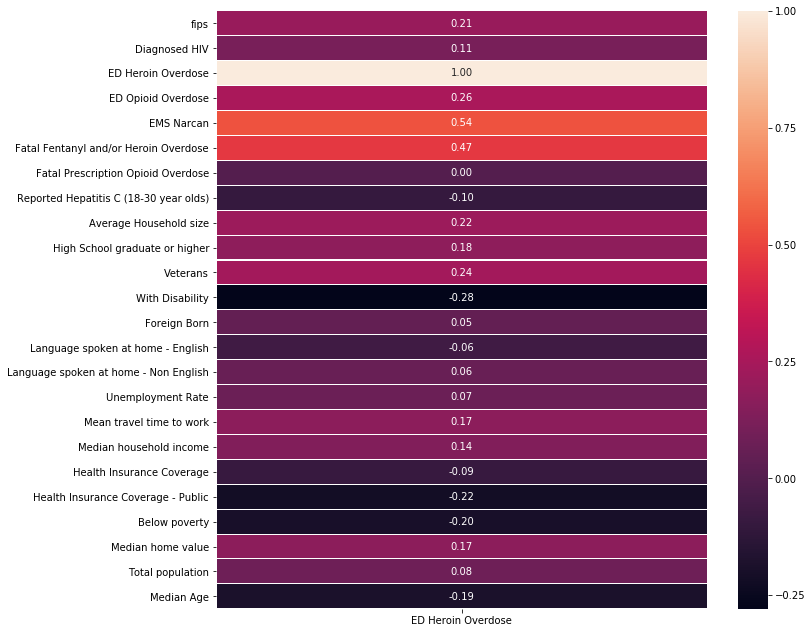

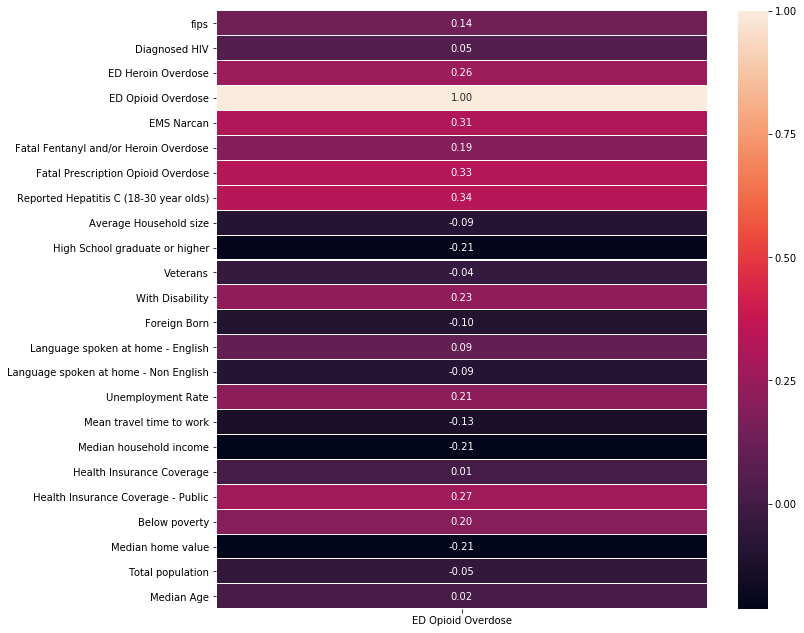

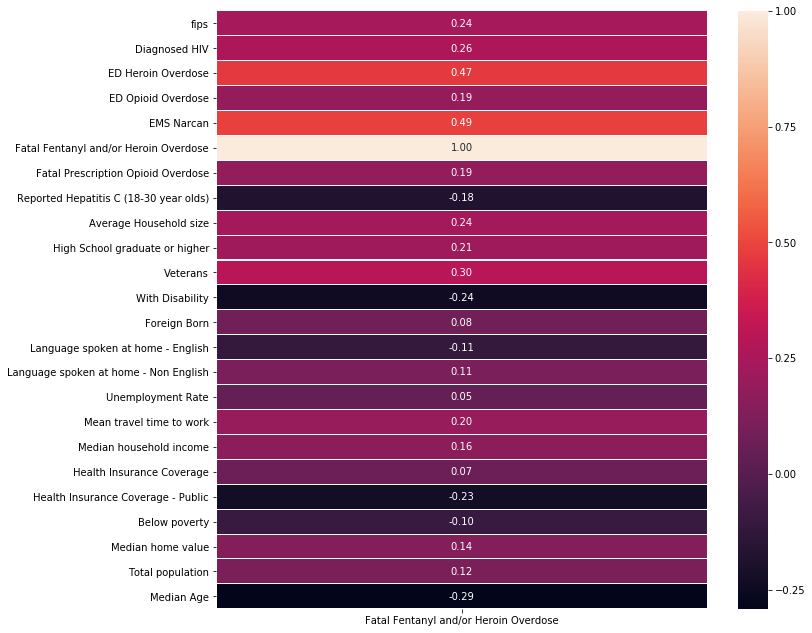

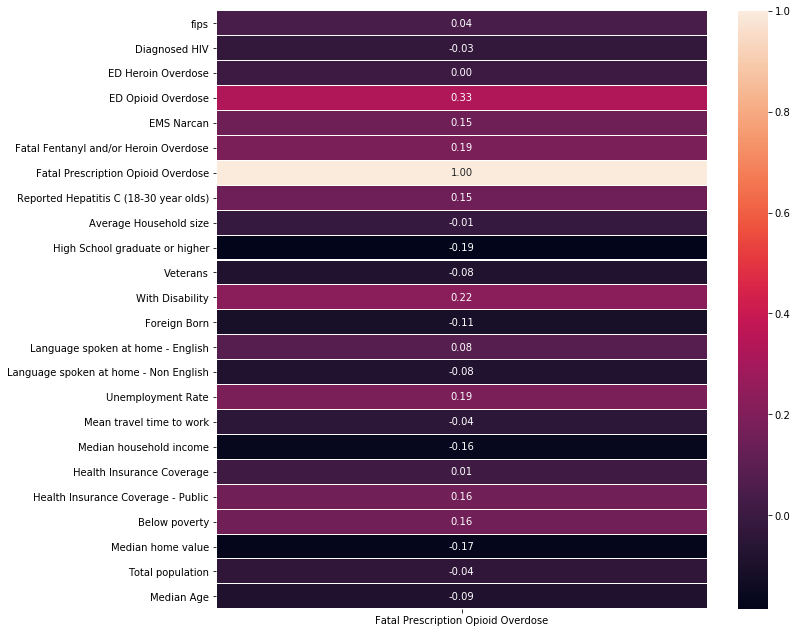

In [4]:
print(df.corr())
# pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal="kde")

# plot corr graphs
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr ed heroin
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Heroin Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr ed opioid
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr fatal heroin
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["Fatal Fentanyl and/or Heroin Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr fatal rx opioid 
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["Fatal Prescription Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
# print("Before NA removed:", df.shape)
# df = df.dropna()
# print("After NA removed:", df.shape)

x_data, y_data = df.drop(["ED Opioid Overdose", "locality_name", "fips"], axis=1), df["ED Opioid Overdose"]


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #impute missing values
        ('std_scaler', StandardScaler()),
])
x_clean = num_pipeline.fit_transform(x_data)
# print("NAs:", x_clean.isna().sum())
# print(np.isnan(x_clean))
# print(np.any(np.isnan(x_clean)))

x_train, x_test, y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)
# print(x_train)
# print(y_train)



linear rmse: 78.91794517258296
linear r2: 0.31601475592149386


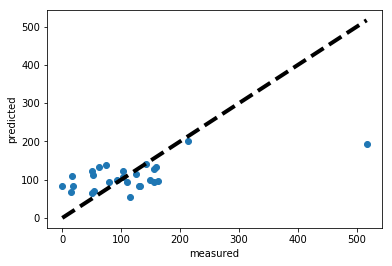

linear rmse: 95.35958968663765
linear r2: 0.001325542169492544


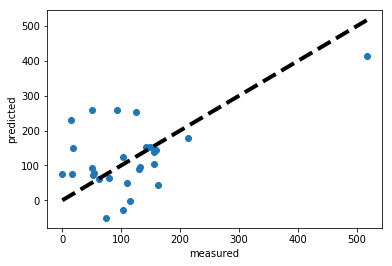

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# RF = RandomForestRegressor(random_state=42)
# RF.fit(x_train, y_train)
# pred = RF.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test, pred)))

# SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
# SGD.fit(x_train, y_train)
# pred = SGD.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test, pred)))

lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print("linear rmse: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("linear r2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(poly_x_train,y_train)
y_predict = lr.predict(poly_x_test)
print("linear rmse: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("linear r2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()